# Frequency resolucion
We will discuss the frequency resolution we can achieve when using FFT. While the frequency discretization we get depends solely on the number of bins chosen for the FFT, this discretization might not correspond to the **true** resolution of the FFT.

In [7]:
import os, sys
sys.path.insert(1, os.getcwd()+'/..')
from internal import *

Create a synthetic signal for testing

In [8]:
sr = 100;     # Hz. Sampling rate
t = 10;       # s. Duration of the signal
N = 100;      # Number of different frequencies to generate per frequency given

f = [12.0, 13.5, 22.0, 22.15, 32.0, 32.075 ] # Hz. Main frequencies of the simulated signals
sigma_f = 0.00 # standard deviation around the frequencies chosen for the signal generation
sigma_A = 0.00 # standard deviation around the amplitudes chosen for the signal generation

F   = np.zeros(N*len(f))
A   = np.zeros(N*len(f))
phi = np.zeros(N*len(f))
k = -1 
for f0 in f:
    k += 1
    F[N*k:N*(k+1)] = generate_frequencies(N, sr=sr, f0=f0,sigma=sigma_f);
    A[N*k:N*(k+1)] = generate_amplitudes(N, sigma= sigma_A);
    # phi[N*k:N*(k+1)] = generate_phase(N);

sort_ids = F.argsort()
F   = F[sort_ids]
A   = A[sort_ids]
phi = phi[sort_ids]
x, y = generate_signal(F, A, t=t, sr=sr, phi=phi);

print(f"True frequency resolution: {1/t}Hz")

True frequency resolution: 0.1Hz


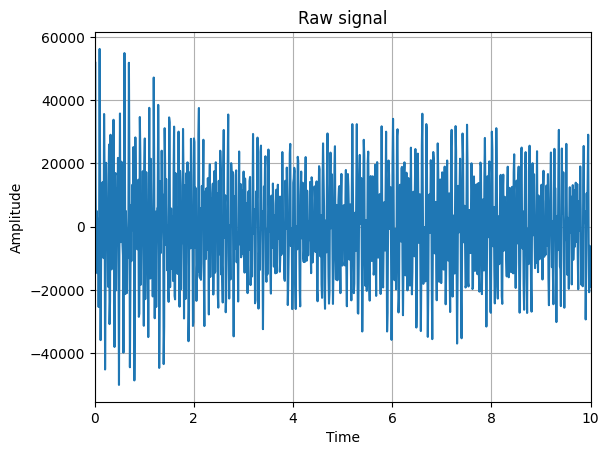

In [9]:

signal = Processor(y, sr)
signal.plot_signal();


### Under-binning $\Rightarrow$ Forced resolution $<$ True resolution

Selecting a number of bins lower than the number of time samples means the energy won't be properly conserved (see previous report)

Warning!
  The number of FFT bins (100) is smaller than the number of time samples (1000). The energy might not be conserved
Forced Frequency resolution: 1.0Hz


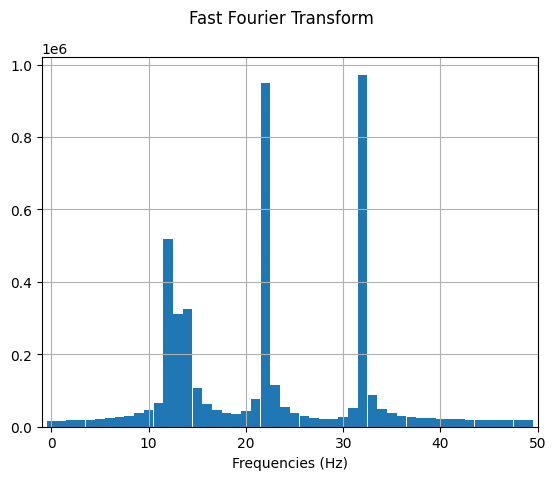

In [10]:

n_bins = 100
signal.fft_bin(n_bins)
signal.bins_check()
signal.plot_fft();
print(f"Forced Frequency resolution: {sr/n_bins}Hz")

### Precise-binning $\Rightarrow$ Forced resolution $=$ True resolution

Selecting a number of bins equal to the number of time samples lets us showcase the **true** frequency resolution provided by the time window

Forced Frequency resolution: 0.1Hz


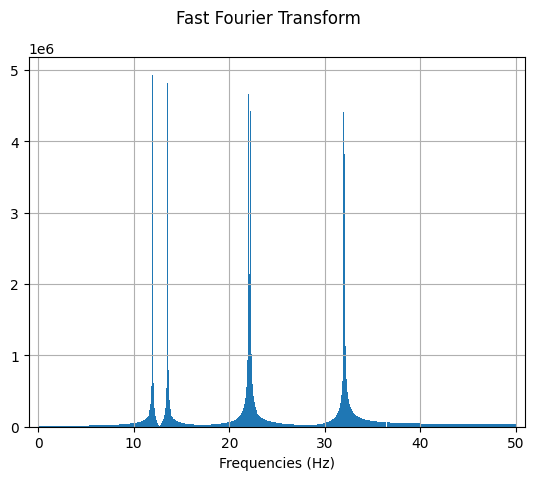

In [11]:

n_bins = 1000
signal.fft_bin(n_bins)
signal.bins_check()
signal.plot_fft();
print(f"Forced Frequency resolution: {sr/n_bins}Hz")

### Over-binning $\Rightarrow$ Forced resolution $>$ True resolution
Selecting a number of bins higher than the number of samples in the time signal leads to artifacts in the FFT

Warning!
  The number of FFT bins (2000) is greater than the number of time samples (1000). The resulting frequency resolution will not be accurate
Forced Frequency resolution: 0.05Hz


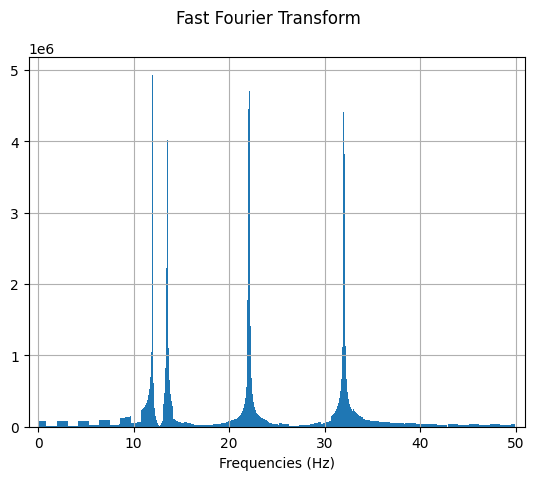

In [12]:

n_bins = 2000
signal.fft_bin(n_bins)
signal.bins_check()
signal.plot_fft();
print(f"Forced Frequency resolution: {sr/n_bins}Hz")